<a href="https://colab.research.google.com/github/AndC314/ActivityProject/blob/master/extrapolating_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [63]:
t = np.linspace(0,3.14,10)
y = np.sin(t)
t2 = np.linspace(3.14,6.28*4,80)
y2 = np.sin(t2)

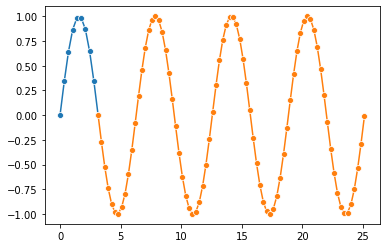

In [64]:
sns.lineplot(x=t, y=y, marker='o')
sns.lineplot(x=t2, y=y2, marker='o')

In [65]:
rfc = RandomForestRegressor()
rfc.fit(t.reshape(-1,1),y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [66]:
y_pred = rfc.predict(t.reshape(-1,1))

In [67]:
y_pred

array([0.14132965, 0.2883268 , 0.57536657, 0.81834085, 0.94237864,
       0.93952573, 0.88370531, 0.66196023, 0.32989552, 0.16149908])

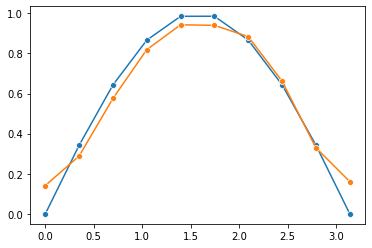

In [68]:
sns.lineplot(x=t, y=y, marker='o')
sns.lineplot(x=t, y=y_pred, marker='o')

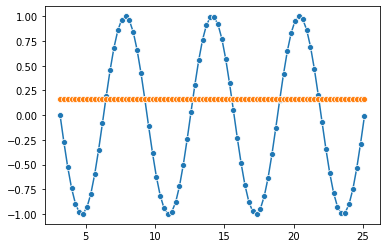

In [69]:
sns.lineplot(x=t2, y=y2, marker='o')
sns.lineplot(x=t2, y=rfc.predict(t2.reshape(-1,1)), marker='o')

In [70]:
x_all = np.concatenate([t, t2])
y_all = np.concatenate([y, y2])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


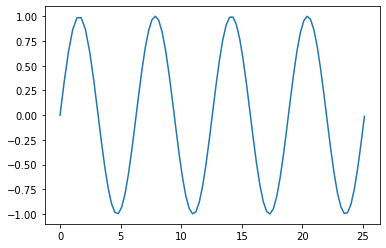

In [71]:
sns.lineplot(x_all, y_all)

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(x_all, y_all, random_state=42, test_size=0.5)
rfc.fit(X_train.reshape(-1,1),y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

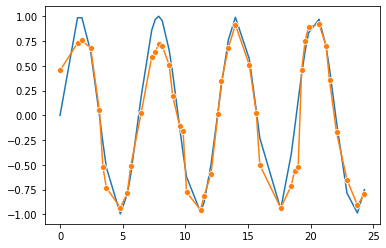

In [74]:
#sns.lineplot(x=X_train, y=y_train, marker='o')
sns.lineplot(x=X_test, y=y_test)
sns.lineplot(x=X_test, y=rfc.predict(X_test.reshape(-1,1)), marker='o')

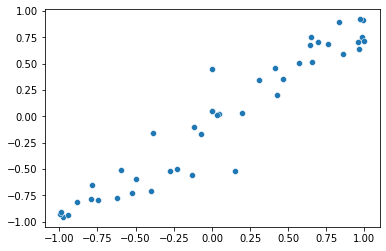

In [75]:
sns.scatterplot(x=y_test, y=rfc.predict(X_test.reshape(-1,1)))

In [78]:
t3 = np.linspace(6.28*3,6.28*6,80)
y3 = np.sin(t3)
y_pred3 = rfc.predict(t3.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


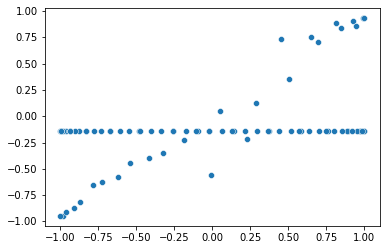

In [79]:
sns.scatterplot(y3, y_pred3)